# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [3]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp12 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327025954733101057
1327025955672629249
1327025958910644225
1327025959036284928
1327025960181510144
1327025960235933696
1327025960210886658
1327025960386965505
1327025961808789504
1327025962161205255
1327025961984872448
1327025963486511104
1327025963654393857
1327025964312772609
1327025964451295232
1327025964577157126
1327025965789306880
1327025966976094208
1327025967081132032
1327025967571857408
1327025967873855489
1327025967706017794
1327025969144627200
1327025969262075904
1327025969480278016
1327025969664847874
1327025970335932422
1327025970558144512
1327025970767929345
1327025971078291463
1327025972013633538
1327025972411940864
1327025973095645184
1327025972999237633
1327025973070589954
1327025975138332672
1327025975431983104
1327025975398453249
1327025975788507137
1327025975943712778
1327025976753201152
1327025977243938818
1327025977915043840
1327025979026509843
1327025979798163456
1327025979995287553
1327025980922355714
1327025981622677504
1327025981828329472
1327025981849264128


1327026202020896770
1327026202230591489
1327026202750582785
1327026203488886790
1327026204424237058
1327026205669945345
1327026207913877504
1327026208031305731
1327026208006168577
1327026209134350337
1327026209180495872
1327026210162008064
1327026210426195968
1327026211785150464
1327026212066168834
1327026212070297600
1327026212145950721
1327026212364029955
1327026213647491079
1327026214217814016
1327026214100496386
1327026214939320322
1327026216558338048
1327026216776454144
1327026217049071619
1327026217816633347
1327026218286387201
1327026220572188673
1327026222291816448
1327026223734607872
1327026224565264385
1327026224607223811
1327026225135554560
1327026225936740354
1327026226356219904
1327026225722880006
1327026226993762304
1327026227396419584
1327026227719401475
1327026228256251905
1327026230554742787
1327026230735085570
1327026231037071361
1327026231699771393
1327026232417005568
1327026232572129280
1327026233033494528
1327026234413477890
1327026235092897792
1327026235583639555


1327026468824752130
1327026468766044166
1327026470443765764
1327026470368120834
1327026470506655751
1327026471043555330
1327026470942859265
1327026471240601601
1327026471391678464
1327026471437824010
1327026471777529856
1327026471634800640
1327026474461712384
1327026475015544834
1327026475657273344
1327026476219297795
1327026476328251392
1327026476756058112
1327026477297262592
1327026477792161792
1327026477930586112
1327026477859221506
1327026478198886400
1327026478320672768
1327026478370992129
1327026478538772480
1327026479155343360
1327026481092935680
1327026482540146690
1327026484750528518
1327026484603707398
1327026484972843008
1327026485199253505
1327026486113669122
1327026486625280000
1327026487023853568
1327026488147927045
1327026488202457090
1327026488466608131
1327026489028616193
1327026489792061441
1327026490681200641
1327026492086374403
1327026492161859587
1327026492631560198
1327026494770700289
1327026496154849281
1327026496846901250
1327026497501204485
1327026497643798529


1327026723385389056
1327026724064931840
1327026723402248196
1327026724907986944
1327026725201522690
1327026725696413696
1327026726896021506
1327026727500001282
1327026731782443011
1327026731878916097
1327026733556649985
1327026733812473856
1327026733975965697
1327026734101913602
1327026734198386690
1327026734357753856
1327026734714249219
1327026735825768451
1327026736207441923
1327026737075679232
1327026737667051522
1327026738346549255
1327026738526883842
1327026739327889408
1327026740573638656
1327026740535971841
1327026741035065344
1327026741207060482
1327026740678565888
1327026741483868160
1327026741638959104
1327026742104444929
1327026741915881480
1327026742272405505
1327026742272397312
1327026743010619394
1327026743174180865
1327026743706791936
1327026743677513729
1327026743874637826
1327026745971777536
1327026746324099073
1327026746516901889
1327026746722496512
1327026749352390659
1327026750929268736
1327026753165025281
1327026753936691201
1327026754347798529
1327026754645528579


1327026983608459264
1327026984065634305
1327026984061456385
1327026984266964992
1327026984736550912
1327026985533657090
1327026987488079872
1327026989404917768
1327026989551771653
1327026989274902530
1327026989987811329
1327026990709415939
1327026990768132096
1327026991133057030
1327026991627964418
1327026991883841536
1327026991997087744
1327026992273707009
1327026993179799552
1327026993347649537
1327026993813184514
1327026994207485954
1327026994597429248
1327026994417197060
1327026994945658880
1327026996837195777
1327026996963135490
1327026998116573184
1327026998267539458
1327026997940408321
1327026998657552384
1327026998997372929
1327026999576162314
1327026999760662529
1327027000775733249
1327027002356887552
1327027003166515201
1327027001736065024
1327027004676263936
1327027006907817987
1327027006895165440
1327027007515987969
1327027007620845568
1327027008220479488
1327027008983928837
1327027010753978371
1327027010774786049
1327027011131478022
1327027011781615619
1327027012888719360


1327027207676383232
1327027207768846338
1327027208792256517
1327027209471549441
1327027211010936832
1327027212617474055
1327027213036900358
1327027213355532288
1327027213192060933
1327027213724737536
1327027214219685889
1327027214299369473
1327027214706208769
1327027215100489728
1327027215733825537
1327027215771504640
1327027217063415814
1327027217147121664
1327027217273139202
1327027217386397696
1327027218418192386
1327027218825039872
1327027218984411136
1327027219689050112
1327027220179652609
1327027221211582469
1327027221672972294
1327027222448902151
1327027223602278400
1327027223593938944
1327027223984025602
1327027224869036035
1327027226005696517
1327027226202738695
1327027226722795521
1327027227133833217
1327027227528028161
1327027227817603074
1327027227788193798
1327027227997990913
1327027228979331072
1327027229088501761
1327027229612707841
1327027229721706497
1327027230644506625
1327027231584038913
1327027232494084096
1327027233362489345
1327027233345585152
1327027235157663744


1327027463243837448
1327027463684145153
1327027464216993800
1327027464560734208
1327027464707710976
1327027464783204353
1327027465118576640
1327027468067250176
1327027469103357952
1327027469925408769
1327027471347310593
1327027472232292353
1327027472844484608
1327027473075191809
1327027473234731013
1327027473700319232
1327027473977143298
1327027474459471873
1327027474404958208
1327027474673393676
1327027475541585921
1327027475902238722
1327027476745302017
1327027476602753025
1327027477709873154
1327027478074974209
1327027478456459264
1327027479295520769
1327027479459061760
1327027479597477891
1327027480696295424
1327027482885648384
1327027485154942976
1327027485440086017
1327027485553397765
1327027487805739009
1327027487604404224
1327027487780478976
1327027489399472128
1327027490519351296
1327027489462489095
1327027490783694853
1327027490733355008
1327027491299536897
1327027491719012354
1327027492427710465
1327027492654288896
1327027493652586496
1327027493900079104
1327027494143356929


1327027707075551232
1327027707595644928
1327027707662594048
1327027709440978944
1327027709529239554
1327027710053543936
1327027710850428928
1327027710925938690
1327027711307640833
1327027711999692801
1327027712309997574
1327027712008007680
1327027712339243008
1327027714306449408
1327027715829084162
1327027716110118912
1327027716319825920
1327027717745872897
1327027718244896768
1327027721118117890
1327027721227014144
1327027722045059073
1327027722317668354
1327027722728730625
1327027722904870912
1327027723244539907
1327027723512975360
1327027725324922880
1327027725563879425
1327027725882691584
1327027725803118595
1327027727090806784
1327027728294449152
1327027729233899521
1327027730110689280
1327027731272491021
1327027733277208576
1327027733608734721
1327027735198314501
1327027735500349441
1327027736272011264
1327027736842530817
1327027738859900928
1327027740676030464
1327027741640765440
1327027741913395201
1327027741984690177
1327027741896568832
1327027742370635777
1327027742446071808


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [16]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 23:24:53 +0000 2020'
'Thu Nov 12 23:24:53 +0000 2020'
'Thu Nov 12 23:24:52 +0000 2020'
'Thu Nov 12 23:24:52 +0000 2020'
'Thu Nov 12 23:24:52 +0000 2020'
'Thu Nov 12 23:24:51 +0000 2020'
'Thu Nov 12 23:24:51 +0000 2020'
'Thu Nov 12 23:24:51 +0000 2020'
'Thu Nov 12 23:24:51 +0000 2020'
'Thu Nov 12 23:24:50 +0000 2020'
'Thu Nov 12 23:24:50 +0000 2020'
'Thu Nov 12 23:24:50 +0000 2020'
'Thu Nov 12 23:24:49 +0000 2020'
'Thu Nov 12 23:24:49 +0000 2020'
'Thu Nov 12 23:24:49 +0000 2020'
'Thu Nov 12 23:24:49 +0000 2020'
'Thu Nov 12 23:24:49 +0000 2020'
'Thu Nov 12 23:24:48 +0000 2020'
'Thu Nov 12 23:24:48 +0000 2020'
'Thu Nov 12 23:24:48 +0000 2020'
'Thu Nov 12 23:24:47 +0000 2020'
'Thu Nov 12 23:24:47 +0000 2020'
'Thu Nov 12 23:24:47 +0000 2020'
'Thu Nov 12 23:24:47 +0000 2020'
'Thu Nov 12 23:24:47 +0000 2020'
'Thu Nov 12 23:24:47 +0000 2020'
'Thu Nov 12 23:24:45 +0000 2020'
'Thu Nov 12 23:24:45 +0000 2020'
'Thu Nov 12 23:24:45 +0000 2020'
'Thu Nov 12 23:24:45 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 23:24:27 +0000 2020'
'Thu Nov 12 23:24:27 +0000 2020'
'Thu Nov 12 23:24:27 +0000 2020'
'Thu Nov 12 23:24:27 +0000 2020'
'Thu Nov 12 23:24:26 +0000 2020'
'Thu Nov 12 23:24:26 +0000 2020'
'Thu Nov 12 23:24:26 +0000 2020'
'Thu Nov 12 23:24:26 +0000 2020'
'Thu Nov 12 23:24:26 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:25 +0000 2020'
'Thu Nov 12 23:24:24 +0000 2020'
'Thu Nov 12 23:24:24 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:23 +0000 2020'
'Thu Nov 12 23:24:22 +0000 2020'
'Thu Nov 12 23:24:22 +0000 2020'
'Thu Nov 1

'Thu Nov 12 23:23:24 +0000 2020'
'Thu Nov 12 23:23:24 +0000 2020'
'Thu Nov 12 23:23:23 +0000 2020'
'Thu Nov 12 23:23:23 +0000 2020'
'Thu Nov 12 23:23:22 +0000 2020'
'Thu Nov 12 23:23:22 +0000 2020'
'Thu Nov 12 23:23:22 +0000 2020'
'Thu Nov 12 23:23:22 +0000 2020'
'Thu Nov 12 23:23:22 +0000 2020'
'Thu Nov 12 23:23:22 +0000 2020'
'Thu Nov 12 23:23:21 +0000 2020'
'Thu Nov 12 23:23:21 +0000 2020'
'Thu Nov 12 23:23:21 +0000 2020'
'Thu Nov 12 23:23:21 +0000 2020'
'Thu Nov 12 23:23:21 +0000 2020'
'Thu Nov 12 23:23:20 +0000 2020'
'Thu Nov 12 23:23:20 +0000 2020'
'Thu Nov 12 23:23:20 +0000 2020'
'Thu Nov 12 23:23:20 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:19 +0000 2020'
'Thu Nov 12 23:23:18 +0000 2020'
'Thu Nov 12 23:23:18 +0000 2020'
'Thu Nov 12 23:23:18 +0000 2020'
'Thu Nov 12 23:23:18 +0000 2020'
'Thu Nov 1

'Thu Nov 12 23:22:24 +0000 2020'
'Thu Nov 12 23:22:24 +0000 2020'
'Thu Nov 12 23:22:24 +0000 2020'
'Thu Nov 12 23:22:24 +0000 2020'
'Thu Nov 12 23:22:23 +0000 2020'
'Thu Nov 12 23:22:23 +0000 2020'
'Thu Nov 12 23:22:22 +0000 2020'
'Thu Nov 12 23:22:21 +0000 2020'
'Thu Nov 12 23:22:21 +0000 2020'
'Thu Nov 12 23:22:21 +0000 2020'
'Thu Nov 12 23:22:21 +0000 2020'
'Thu Nov 12 23:22:21 +0000 2020'
'Thu Nov 12 23:22:20 +0000 2020'
'Thu Nov 12 23:22:20 +0000 2020'
'Thu Nov 12 23:22:18 +0000 2020'
'Thu Nov 12 23:22:18 +0000 2020'
'Thu Nov 12 23:22:18 +0000 2020'
'Thu Nov 12 23:22:18 +0000 2020'
'Thu Nov 12 23:22:18 +0000 2020'
'Thu Nov 12 23:22:17 +0000 2020'
'Thu Nov 12 23:22:17 +0000 2020'
'Thu Nov 12 23:22:17 +0000 2020'
'Thu Nov 12 23:22:17 +0000 2020'
'Thu Nov 12 23:22:16 +0000 2020'
'Thu Nov 12 23:22:16 +0000 2020'
'Thu Nov 12 23:22:16 +0000 2020'
'Thu Nov 12 23:22:15 +0000 2020'
'Thu Nov 12 23:22:15 +0000 2020'
'Thu Nov 12 23:22:15 +0000 2020'
'Thu Nov 12 23:22:15 +0000 2020'
'Thu Nov 1

'Thu Nov 12 23:21:21 +0000 2020'
'Thu Nov 12 23:21:20 +0000 2020'
'Thu Nov 12 23:21:20 +0000 2020'
'Thu Nov 12 23:21:20 +0000 2020'
'Thu Nov 12 23:21:20 +0000 2020'
'Thu Nov 12 23:21:20 +0000 2020'
'Thu Nov 12 23:21:20 +0000 2020'
'Thu Nov 12 23:21:19 +0000 2020'
'Thu Nov 12 23:21:19 +0000 2020'
'Thu Nov 12 23:21:19 +0000 2020'
'Thu Nov 12 23:21:19 +0000 2020'
'Thu Nov 12 23:21:19 +0000 2020'
'Thu Nov 12 23:21:18 +0000 2020'
'Thu Nov 12 23:21:17 +0000 2020'
'Thu Nov 12 23:21:17 +0000 2020'
'Thu Nov 12 23:21:17 +0000 2020'
'Thu Nov 12 23:21:17 +0000 2020'
'Thu Nov 12 23:21:17 +0000 2020'
'Thu Nov 12 23:21:17 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:16 +0000 2020'
'Thu Nov 12 23:21:15 +0000 2020'
'Thu Nov 12 23:21:15 +0000 2020'
'Thu Nov 1

'Thu Nov 12 23:20:13 +0000 2020'
'Thu Nov 12 23:20:13 +0000 2020'
'Thu Nov 12 23:20:13 +0000 2020'
'Thu Nov 12 23:20:13 +0000 2020'
'Thu Nov 12 23:20:12 +0000 2020'
'Thu Nov 12 23:20:12 +0000 2020'
'Thu Nov 12 23:20:12 +0000 2020'
'Thu Nov 12 23:20:12 +0000 2020'
'Thu Nov 12 23:20:11 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:10 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:09 +0000 2020'
'Thu Nov 12 23:20:08 +0000 2020'
'Thu Nov 12 23:20:08 +0000 2020'
'Thu Nov 12 23:20:08 +0000 2020'
'Thu Nov 12 23:20:08 +0000 2020'
'Thu Nov 12 23:20:08 +0000 2020'
'Thu Nov 12 23:20:08 +0000 2020'
'Thu Nov 1

'Thu Nov 12 23:19:18 +0000 2020'
'Thu Nov 12 23:19:18 +0000 2020'
'Thu Nov 12 23:19:17 +0000 2020'
'Thu Nov 12 23:19:17 +0000 2020'
'Thu Nov 12 23:19:17 +0000 2020'
'Thu Nov 12 23:19:17 +0000 2020'
'Thu Nov 12 23:19:16 +0000 2020'
'Thu Nov 12 23:19:16 +0000 2020'
'Thu Nov 12 23:19:15 +0000 2020'
'Thu Nov 12 23:19:15 +0000 2020'
'Thu Nov 12 23:19:14 +0000 2020'
'Thu Nov 12 23:19:14 +0000 2020'
'Thu Nov 12 23:19:14 +0000 2020'
'Thu Nov 12 23:19:14 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:13 +0000 2020'
'Thu Nov 12 23:19:12 +0000 2020'
'Thu Nov 12 23:19:12 +0000 2020'
'Thu Nov 12 23:19:12 +0000 2020'
'Thu Nov 12 23:19:12 +0000 2020'
'Thu Nov 12 23:19:12 +0000 2020'
'Thu Nov 12 23:19:12 +0000 2020'
'Thu Nov 12 23:19:11 +0000 2020'
'Thu Nov 12 23:19:11 +0000 2020'
'Thu Nov 12 23:19:11 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

13165
11217


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [21]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: YK Hanley
text: The election is over and covid19 is STILL here. Which numbnuts was saying it would be gone after the election? That… https://t.co/PJLureMxtE
----
name: Ellen
text: to thank them for their DOMINION election fraud help
----
name: Jacquie Ann March
text: Has anyone heard trump mention Covid at all since Election Day? #trumpsucks #covid19
----
name: the bot formerly known as layoff
text: In the last half hour, 829 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: #StayHome
text: RT @michaeldiaz101: #Covid19 is running rampant through the US and we have a "leader" that is still whining about the election he LOST and…
----
name: Jr. Samples
text: RT @WaytowichNeil: This is the direct result of electing an unqualified and unprepared Premier who has more interest in governing for corpo…
----
name: mad radhu
text: @SenFeinstein @SenKamalaHarris @Lakers @Dodgers Thank you, Ma'am! This is what we elected you to do!!!!!!! 💪😤🏈… https://t.co/TZ53eLAvy

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,lang,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,retweeted_status,extended_tweet,display_text_range,extended_entities
0,5fadc3da38a69bb46f9ca322,Thu Nov 12 22:45:18 +0000 2020,1327019669182705664,1327019669182705664,The election is over and covid19 is STILL here...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fadc18138a69bb46f9c7957,Thu Nov 12 23:13:00 +0000 2020,1327026640787009536,1327026640787009536,to thank them for their DOMINION election frau...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,en,"{'url': 'https://t.co/NIKrSx03nR', 'expanded':...",0.0,0.0,low,1605222780783,NaN,NaN,NaN,NaN
2,5fadc1c238a69bb46f9c7b0b,Thu Nov 12 23:14:04 +0000 2020,1327026909977452549,1327026909977452549,Has anyone heard trump mention Covid at all si...,False,"{'hashtags': [{'text': 'trumpsucks', 'indices'...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,en,NaN,0.0,0.0,low,1605222844963,NaN,NaN,NaN,NaN
3,5fadc3ae38a69bb46f9c927a,Thu Nov 12 23:01:19 +0000 2020,1327023700055474177,1327023700055474177,"In the last half hour, 829 people tweeted abou...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fadc1b938a69bb46f9c7ad0,Thu Nov 12 23:13:56 +0000 2020,1327026875382833153,1327026875382833153,RT @michaeldiaz101: #Covid19 is running rampan...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...",NaN,"<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,en,NaN,0.0,0.0,low,1605222836715,{'created_at': 'Thu Nov 12 23:13:55 +0000 2020...,NaN,NaN,NaN
5,5fadc06ab971988f4cfacd70,Thu Nov 12 23:08:21 +0000 2020,1327025470035128324,1327025470035128324,RT @WaytowichNeil: This is the direct result o...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,en,"{'url': 'https://t.co/Mo1Gl7NRVo', 'expanded':...",0.0,0.0,low,1605222501654,{'created_at': 'Thu Nov 12 19:25:47 +0000 2020...,NaN,NaN,NaN
6,5fadc454617a0aa1396aa284,Thu Nov 12 23:22:35 +0000 2020,1327029052914352128,1327029052914352128,@SenFeinstein @SenKamalaHarris @Lakers @Dodger...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327015e+18,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fadc3a938a69bb46f9c90d5,Thu Nov 12 23:02:56 +0000 2020,1327024107641331714,1327024107641331714,RT @GrondaMorin: @funder @SenatorLankford/ WHA...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 06:15:58 +0000 2020...,NaN,NaN,NaN
8,5fadc3d138a69bb46f9c9fea,Thu Nov 12 22:48:13 +0000 2020,1327020402162372608,1327020402162372608,RT @moonriver365: I just spoke to @JoeBiden an...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 00:31:46 +0000 2020...,NaN,NaN,NaN
9,5fadc3c738a69bb46f9c9c1d,Thu Nov 12 22:51:52 +0000 2020,1327021320845062145,1327021320845062145,RT @moonriver365: I just spoke to @JoeBiden an...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 00:31:46 +0000 2020

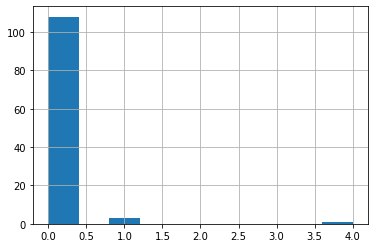

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count